## Importation des modules et configuration de l'environnement de travail
---
Outre les modules essentiels pour faire du machine learning, on importe le fichier `utility_ML.py` contenant l'ensemble des constantes, ressources, fonctions de prétraitement, et classes utilitaires définies.

In [1]:
#MODULE IMPORTATION AND ENVIRONMENT CONFIGURATION
import re
import unicodedata
import pickle
import warnings

from time import time
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import inflect

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

from nltk import pos_tag
from nltk import punkt
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from utility_ML import *

##### UNCOMMENT THIS SECTION ON FIRST EXECUTION
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
#####

plt.style.use('fivethirtyeight') #choose fivethirtyeight style for plt
warnings.filterwarnings('ignore', category=FutureWarning) #filter FutureWarnings

## Importation des datasets de test
---
1. importation des datasets des avis et des labels du projet
2. fusion des datasets et mélange des avis
3. importation du dataset des movies reviews d'un dataset de **IMDB**

In [2]:
#IMPORTATION OF DATASETS

#importation of project Dataset
test_data = import_dataset(TEST_DATA_PATH, 'Avis Test Dataset', sep='\t', names=['Avis'])
test_labels = import_dataset(TEST_TARGET_PATH, 'Score Test Dataset', sep='\t', names=['Score'])
project_df = merge_datasets(test_data, test_labels)
project_df = shuffle_dataset(project_df)

#importation of IMDB Dataset
imdb_df = import_dataset(IMDB_DATA_PATH, 'IMDB Opinions Dataset', sep='\t', names=['Avis', 'Score'])


Avis Test Dataset
Size : (4000, 1)
Head of imported dataset :


,Avis
0,I cant help it but i seem to like films that a...
1,I expected to enjoy a romantic comedy featurin...
2,Why is it that when a star reaches the top of ...
3,What Is It? is a mish-mash of bizarre recurrin...
4,"...am i missing something here??? ""unexpected ..."



Score Test Dataset
Size : (4000, 1)
Head of imported dataset :


,Score
0,-1
1,-1
2,-1
3,-1
4,-1


Size : (4000, 2)
Head of merged dataset :


,Avis,Score
0,I cant help it but i seem to like films that a...,-1
1,I expected to enjoy a romantic comedy featurin...,-1
2,Why is it that when a star reaches the top of ...,-1
3,What Is It? is a mish-mash of bizarre recurrin...,-1
4,"...am i missing something here??? ""unexpected ...",-1


Head of shuffled dataset :


,Avis,Score
0,the single worst film i've ever seen in a thea...,-1
1,"So this was an HBO ""Made for TV Movie"" eh? Is ...",-1
2,"In my mind, this remains one of the very best ...",1
3,Munchies starts in deepest darkest Peru (looks...,-1
4,I wish I could say that this show was unusual ...,-1



IMDB Opinions Dataset
Size : (10000, 2)
Head of imported dataset :


,Avis,Score
0,"Some of the secondary actors try, really hard....",-1
1,This movie is like Happiness meets Lost in Tra...,1
2,Recycled and predictable plot. The characters ...,-1
3,I saw this on cable. Someone had to lose their...,-1
4,What could have been some majorly creepy stuff...,-1


## Chargement des modèles sauvegardés
---
On charge les modèles **Logistic Regression** et **Gaussian Naive Bayes** sauvegardés au préalable

In [3]:
#CLASSIFIERS LOADING USING PICKLE

#loading the pipeline containing the trained GaussianNB classifier
gnb_loaded = pickle.load(open(GAUSSIANNB_PATH, 'rb'))

#loading the pipeline containing the trained LogisticRegression classifier
lr_loaded = pickle.load(open(LOGISTICREGRESSION_PATH, 'rb'))

## Prédiction des labels des avis du dataset du projet
---

In [4]:
#PREDICTION ON PROJECT DATASET

#prediction of data on the project Dataset using the LogisticRegression classifier
start_time = time()
print('\nLogisticRegression classifier prediction of project dataset started at {}'.format(datetime.now()))
prediction_results = lr_loaded.predict(project_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, project_df['Score'])
conf = confusion_matrix(project_df['Score'], prediction_results)
report = classification_report(project_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))

#prediction of data on the project Dataset using the GaussianNB classifier
start_time = time()
print('\nGaussianNB classifier prediction of project dataset started at {}'.format(datetime.now()))
prediction_results = gnb_loaded.predict(project_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, project_df['Score'])
conf = confusion_matrix(project_df['Score'], prediction_results)
report = classification_report(project_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))


LogisticRegression classifier prediction of project dataset started at 2019-04-19 11:53:10.198264

Time taken to complete prediction: 40.0956335067749 seconds

Accuracy: 0.895
Confusion Matrix
[[1770  230]
 [ 190 1810]]

Classification Report
              precision    recall  f1-score   support

          -1       0.90      0.89      0.89      2000
           1       0.89      0.91      0.90      2000

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.90      0.90      0.89      4000
weighted avg       0.90      0.90      0.89      4000



GaussianNB classifier prediction of project dataset started at 2019-04-19 11:53:50.302724

Time taken to complete prediction: 42.45877385139465 seconds

Accuracy: 0.844
Confusion Matrix
[[1666  334]
 [ 290 1710]]

Classification Report
              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      2000
           1       0.84      0.85      0.85      2000

   micro avg       0.84    

## Pré-traitement et visualisation des avis du dataset IMDB
---
Avant de tester les classifieurs sur le dataset **IMDB**, on effectue un pré-traitement des avis afin de visualiser les mots les plus fréquents dans les avis positifs et négatifs avec un **Word Cloud**

In [5]:
#PREPROCESSING OF IMDB DATASET FOR VISUALIZATION
imdb_transformed = imdb_df.copy()
imdb_transformed['Avis'] = preprocess_dataset(imdb_transformed['Avis'])
display(imdb_transformed['Avis'].head())

0    secondary try really hard camera shot desert q...
1    like happiness meet lose translation sixth sen...
2    recycle predictable memorable line come minute...
3    saw cable someone lose job greenlighting one a...
4    could majorly creepy stuff end incomprehensibl...
Name: Avis, dtype: object

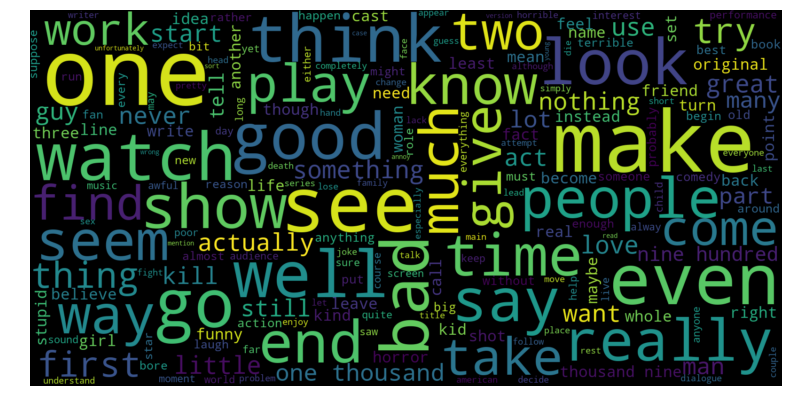

In [6]:
#VISUALIZING MOST FREQUENT WORD IN NEGATIVE OPINIONS
neg_avis = imdb_transformed[imdb_transformed['Score']==-1]
neg_avis = [document for document in neg_avis['Avis']]
neg_avis = pd.Series(neg_avis).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_avis)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

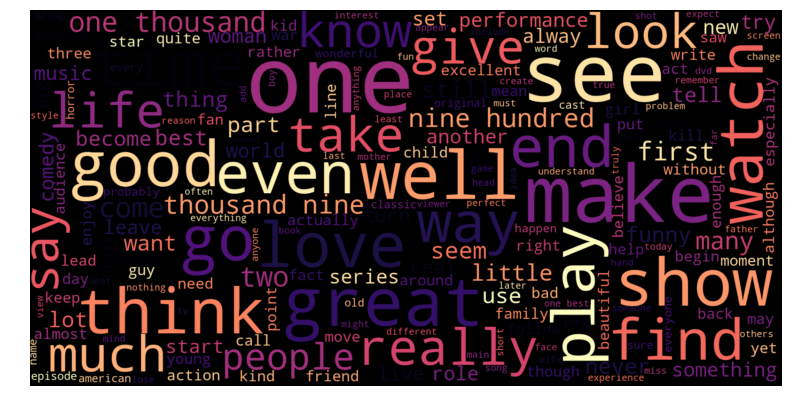

In [7]:
#VISUALIZING MOST FREQUENT WORD IN POSITIVE OPINIONS
pos_avis = imdb_transformed[imdb_transformed['Score']==1]
pos_avis = [document for document in pos_avis['Avis']]
pos_avis = pd.Series(pos_avis).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma').generate(pos_avis)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Prédiction des avis du dataset IMDB
---

In [8]:
#PREDICTION ON IMDB DATASET

#prediction of data on the IMDB Dataset using the LogisticRegression classifier
start_time = time()
print('\nLogisticRegression classifier prediction of IMDB dataset started at {}'.format(datetime.now()))
prediction_results = lr_loaded.predict(imdb_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, imdb_df['Score'])
conf = confusion_matrix(imdb_df['Score'], prediction_results)
report = classification_report(imdb_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))

#prediction of data on the IMDB Dataset using the GaussianNB classifier
start_time = time()
print('\nGaussianNB classifier prediction of IMDB dataset started at {}'.format(datetime.now()))
prediction_results = gnb_loaded.predict(imdb_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, imdb_df['Score'])
conf = confusion_matrix(imdb_df['Score'], prediction_results)
report = classification_report(imdb_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))


LogisticRegression classifier prediction of IMDB dataset started at 2019-04-19 11:57:38.117498

Time taken to complete prediction: 105.42721581459045 seconds

Accuracy: 0.8505
Confusion Matrix
[[4107  893]
 [ 602 4398]]

Classification Report
              precision    recall  f1-score   support

          -1       0.87      0.82      0.85      5000
           1       0.83      0.88      0.85      5000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



GaussianNB classifier prediction of IMDB dataset started at 2019-04-19 11:59:23.560473

Time taken to complete prediction: 106.52276062965393 seconds

Accuracy: 0.772
Confusion Matrix
[[3634 1366]
 [ 914 4086]]

Classification Report
              precision    recall  f1-score   support

          -1       0.80      0.73      0.76      5000
           1       0.75      0.82      0.78      5000

   micro avg       0.77      